<a href="https://colab.research.google.com/github/Amirosein/AGB-stars-ML-project/blob/main/Milestone1/AGB_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, requests
import seaborn as sns

In [ ]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

import warnings
warnings.filterwarnings('ignore')

# load data

In [2]:
url = "https://raw.githubusercontent.com/Amirosein/AGB-stars-ML-project/main/post%20agb.csv"
d1 = requests.get(url, stream=True).content

url = "https://raw.githubusercontent.com/Amirosein/AGB-stars-ML-project/main/O-%20agb.csv"
d2 = requests.get(url, stream=True).content

url = "https://raw.githubusercontent.com/Amirosein/AGB-stars-ML-project/main/C-%20agb.csv"
d3 = requests.get(url, stream=True).content

url = "https://raw.githubusercontent.com/Amirosein/AGB-stars-ML-project/main/S-%20agb.csv"
d4 = requests.get(url, stream=True).content

url = "https://raw.githubusercontent.com/Amirosein/AGB-stars-ML-project/main/YSO.csv"
d5 = requests.get(url, stream=True).content

post = pd.read_csv(io.BytesIO(d1) , index_col=0, header=1)
O = pd.read_csv(io.BytesIO(d2) , index_col=0, header=1)
C = pd.read_csv(io.BytesIO(d3) , index_col=0, header=1)
S = pd.read_csv(io.BytesIO(d4) , index_col=0, header=1)
Young = pd.read_csv(io.BytesIO(d5) , index_col=0, header=1)


In [3]:
counts = pd.concat([O.count(),C.count(),S.count(),post.count(),Young.count()], axis=1) 
counts = counts.rename(columns={0: 'O-AGB', 1: 'C-AGB', 2: 'S-AGB', 3: 'post-AGB', 4: 'YSO'})
 
print(counts)

              O-AGB  C-AGB  S-AGB  post-AGB    YSO
Jmag (1.22u)  15988   5623    329      1571   3118
Hmag (1.63u)  15980   5634    329      1587   3326
Kmag (2.19u)  15988   5651    329      1579   3439
3.4u          15952   5626    328         0  54149
4.6u          15980   5645    329         0  53089
5.8u          12147   4435      0         0   7237
8u            12142   4445      0         0   6945
12u            3810   1190    329         0  44073
22u            7715   4918    329         0  49090
3.6u flux         0      0      0      1270   2175
4.5u flux         0      0      0      1353   2213
5.8u flux         0      0      0      1359   2168
9u flux        3238   1082    305      1407   2222
12u flux       3828   1197    329       236      0
18u flux       3317   1135    309         0      0
25u flux       3828   1197    329      1643   2183
60u flux       3828   1197    329       236      0
65u flux       1842    666     73       203  44001
90u flux       1929    687     

In [4]:
def f2m(f,fz):
  m = - 2.5*np.log10(f/fz)
  return m


def m2f(m,fz):
  f = fz*10**(m/-2.5)
  return f

O_AGB = O
C_AGB = C
S_AGB = S
post_AGB = post
YSO = Young

In [5]:
'''
O: 3.4,4.6,5.8 m-->f
C: 3.4,4.6,5.8 m-->f
S: 3.4,4.6 m-->f / 9 f-->m

p agb: 3.4, 4.6, 5.8, 9, 12, 25 f-->m
'''


O_AGB['3.6u flux'] = m2f(O['3.4u'],281)
O_AGB['4.5u flux'] = m2f(O['4.6u'],180)
O_AGB['5.8u flux'] = m2f(O['5.8u'],115)


C_AGB['3.6u flux'] = m2f(C['3.4u'],281)
C_AGB['4.5u flux'] = m2f(C['4.6u'],180)
C_AGB['5.8u flux'] = m2f(C['5.8u'],115)

S_AGB['3.6u flux'] = m2f(S['3.4u'],281)
S_AGB['4.5u flux'] = m2f(S['4.6u'],180)
S_AGB['8u'] = f2m(S['9u flux'],65)

post_AGB['3.4u'] = f2m(post['3.6u flux'],281)
post_AGB['4.6u'] = f2m(post['4.5u flux'],180)
post_AGB['5.8u'] = f2m(post['5.8u flux'],115)
post_AGB['8u'] = f2m(post['9u flux'],65)
post_AGB['12u'] = f2m(post['12u flux'],32)
post_AGB['22u'] = f2m(post['25u flux'],7)

YSO['12u flux'] = m2f(Young['12u'],32)

In [6]:
counts = pd.concat([O_AGB.count(),C_AGB.count(),S_AGB.count(),post_AGB.count(),YSO.count()], axis=1) 
counts = counts.rename(columns={0: 'O-AGB', 1: 'C-AGB', 2: 'S-AGB', 3: 'post-AGB', 4: 'YSO'})
 
print(counts)

              O-AGB  C-AGB  S-AGB  post-AGB    YSO
Jmag (1.22u)  15988   5623    329      1571   3118
Hmag (1.63u)  15980   5634    329      1587   3326
Kmag (2.19u)  15988   5651    329      1579   3439
3.4u          15952   5626    328      1270  54149
4.6u          15980   5645    329      1353  53089
5.8u          12147   4435      0      1359   7237
8u            12142   4445    305      1407   6945
12u            3810   1190    329       236  44073
22u            7715   4918    329      1643  49090
3.6u flux     15952   5626    328      1270   2175
4.5u flux     15980   5645    329      1353   2213
5.8u flux     12147   4435      0      1359   2168
9u flux        3238   1082    305      1407   2222
12u flux       3828   1197    329       236  44073
18u flux       3317   1135    309         0      0
25u flux       3828   1197    329      1643   2183
60u flux       3828   1197    329       236      0
65u flux       1842    666     73       203  44001
90u flux       1929    687     

In [7]:
frames = [post_AGB, O_AGB, C_AGB, S_AGB, YSO]

All = pd.concat(frames)
All = All.reset_index()

features = All.loc[:,'Jmag (1.22u)':'160u flux']
All.head()

index  Jmag (1.22u)  Hmag (1.63u)  ...  140u flux  160u flux     class
0      1         9.190         8.053  ...        NaN        NaN  post_AGB
1      2         8.686         8.387  ...        NaN        NaN  post_AGB
2      3         9.013         8.743  ...        NaN        NaN  post_AGB
3      4        11.767        11.711  ...        NaN        NaN  post_AGB
4      5           NaN           NaN  ...        NaN        NaN  post_AGB

[5 rows x 24 columns]

In [8]:
from sklearn.preprocessing import OneHotEncoder
a = np.array(All['class'])
OH_Enc = OneHotEncoder( )
OH_Encoded = OH_Enc.fit_transform(a.reshape(-1,1)).toarray()
OH_Outputs = pd.DataFrame(OH_Encoded)
OH_Outputs.columns = ['y1','y2','y3','y4','y5']

OH_Encoded_data = pd.concat([features,OH_Outputs], axis=1)
OH_Encoded_data.head()

Jmag (1.22u)  Hmag (1.63u)  Kmag (2.19u)  3.4u  ...   y2   y3   y4   y5
0         9.190         8.053         7.523   NaN  ...  0.0  0.0  0.0  1.0
1         8.686         8.387         8.163   NaN  ...  0.0  0.0  0.0  1.0
2         9.013         8.743         8.243   NaN  ...  0.0  0.0  0.0  1.0
3        11.767        11.711        11.561   NaN  ...  0.0  0.0  0.0  1.0
4           NaN           NaN           NaN   NaN  ...  0.0  0.0  0.0  1.0

[5 rows x 27 columns]

In [9]:
a = OH_Enc.inverse_transform(np.array([[1, 0, 0, 0, 0],[0, 1, 0, 0, 0],[0, 0, 1, 0, 0]
                          ,[0, 0, 0, 1, 0],[0, 0, 0, 0, 1]]))

print('[1, 0, 0, 0, 0] =',a[0],'\n')
print('[0, 1, 0, 0, 0] =',a[1],'\n')
print('[0, 0, 1, 0, 0] =',a[2],'\n')
print('[0, 0, 0, 1, 0] =',a[3],'\n')
print('[0, 0, 0, 0, 1] =',a[4],'\n')

[1, 0, 0, 0, 0] = ['C_AGB'] 

[0, 1, 0, 0, 0] = ['O_AGB'] 

[0, 0, 1, 0, 0] = ['S_AGB'] 

[0, 0, 0, 1, 0] = ['YSO'] 

[0, 0, 0, 0, 1] = ['post_AGB'] 



In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer()
imp_data = imp.fit_transform(OH_Encoded_data)
imputed_data = pd.DataFrame(imp_data, columns= OH_Encoded_data.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


# Imputed data [X, Y] :

In [11]:
from sklearn.utils import shuffle

data = pd.concat([imputed_data,All['class']], axis=1)
data = shuffle(data, random_state=42)
data = data.reset_index()

X = data.loc[:,'Jmag (1.22u)':'160u flux']
Y = data.loc[:,'y1':'y5']
categories = data['class']

data.head()

index  Jmag (1.22u)  Hmag (1.63u)  Kmag (2.19u)  ...   y3   y4   y5  class
0   9273     12.980000     12.110000     11.860000  ...  0.0  0.0  0.0  O_AGB
1  49049     12.444514     11.328686     10.689757  ...  0.0  1.0  0.0    YSO
2  35615     12.287627     11.538452     11.283399  ...  0.0  1.0  0.0    YSO
3  18672     13.956000     10.299000      6.978000  ...  0.0  0.0  0.0  C_AGB
4  59035     12.591071     11.729381     11.442479  ...  0.0  1.0  0.0    YSO

[5 rows x 29 columns]

In [ ]:
X.describe()

Jmag (1.22u)  Hmag (1.63u)  ...     140u flux     160u flux
count  79566.000000  79566.000000  ...  79566.000000  79566.000000
mean      12.411154     11.413704  ...     32.800498     44.704036
std        1.751895      1.811070  ...    104.399380    151.739334
min       -2.989000     -4.007000  ...   -453.636727   -834.875485
25%       12.335192     11.285517  ...      8.059531     11.376200
50%       12.483895     11.574760  ...     16.966200     33.789836
75%       12.670000     11.859207  ...     34.635076     45.732000
max       31.148937     22.201858  ...   8693.011700  12326.416000

[8 rows x 22 columns]

# Correlation Matrix:

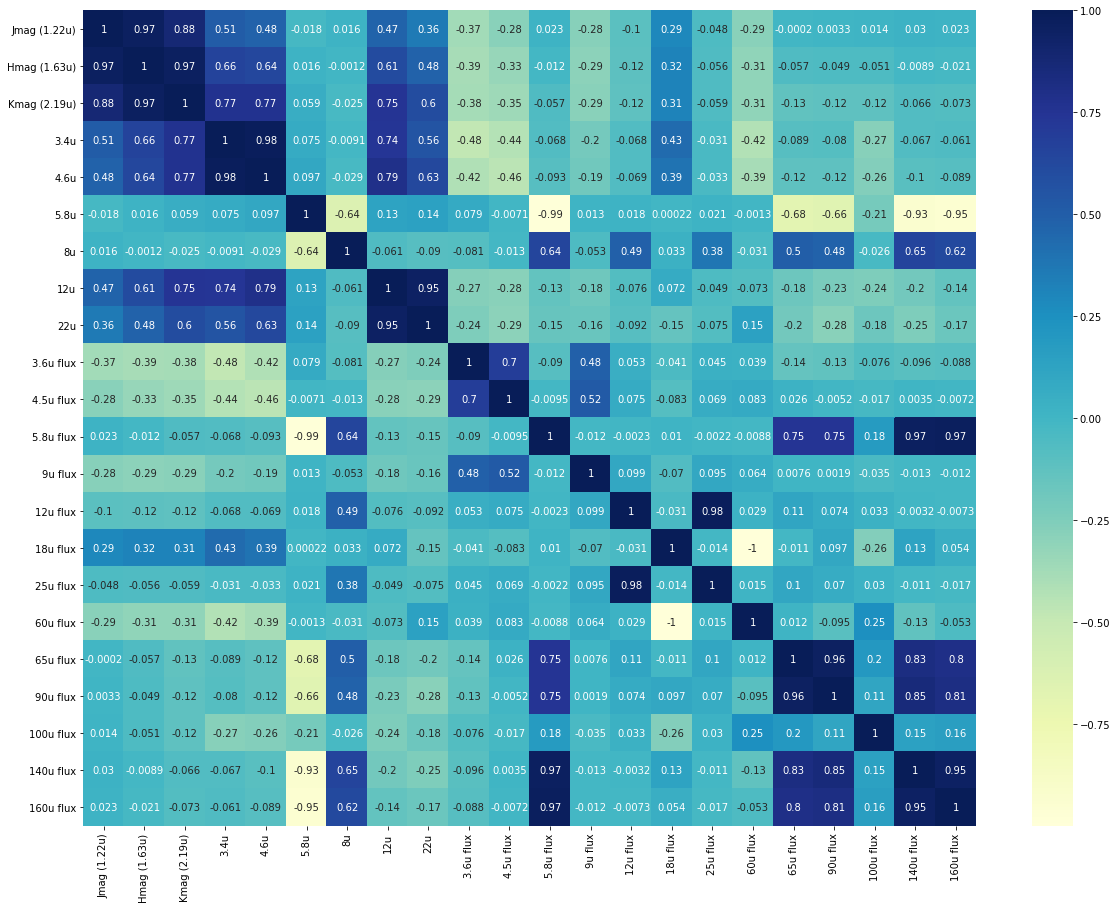

In [ ]:
fig = plt.figure(figsize = [20, 15])
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")

plt.savefig('correlation.pdf')

# Scatter plot:

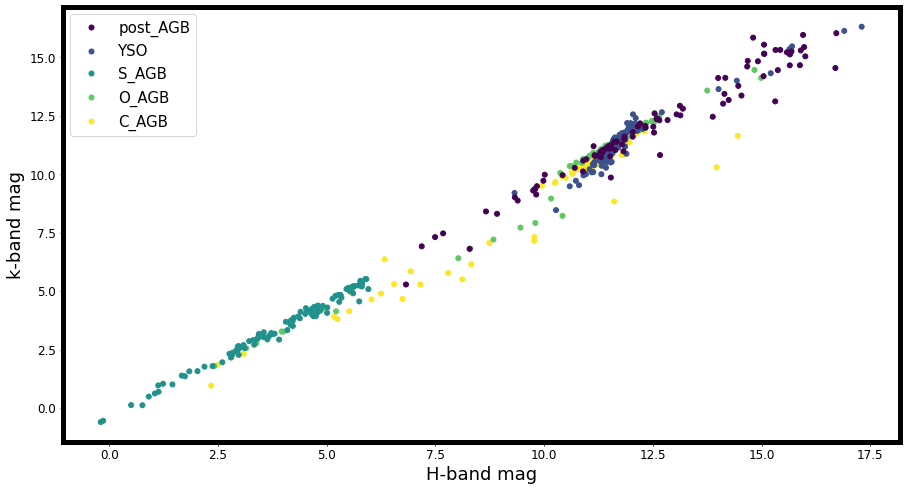

In [46]:
cat_dict = {'post_AGB': 0, 'YSO': 1, 'S_AGB':2, 'O_AGB':3, 'C_AGB':4,}
Xcat = pd.concat([X,categories], axis=1)
sample_X = Xcat.groupby('class').sample(n=100, random_state=1)
colors = [cat_dict[i] for i in sample_X['class']]

fig = plt.figure(figsize = [15, 8])
sc = plt.scatter(sample_X['Hmag (1.63u)'],sample_X['Kmag (2.19u)'], c=colors, marker='o')

plt.legend(handles= sc.legend_elements()[0],
           labels = cat_dict.keys())


plt.xlabel('H-band mag')
plt.ylabel('k-band mag')
pic = sm[0][0].get_figure() 
pic.savefig("ScatterHk.png")
plt.show()

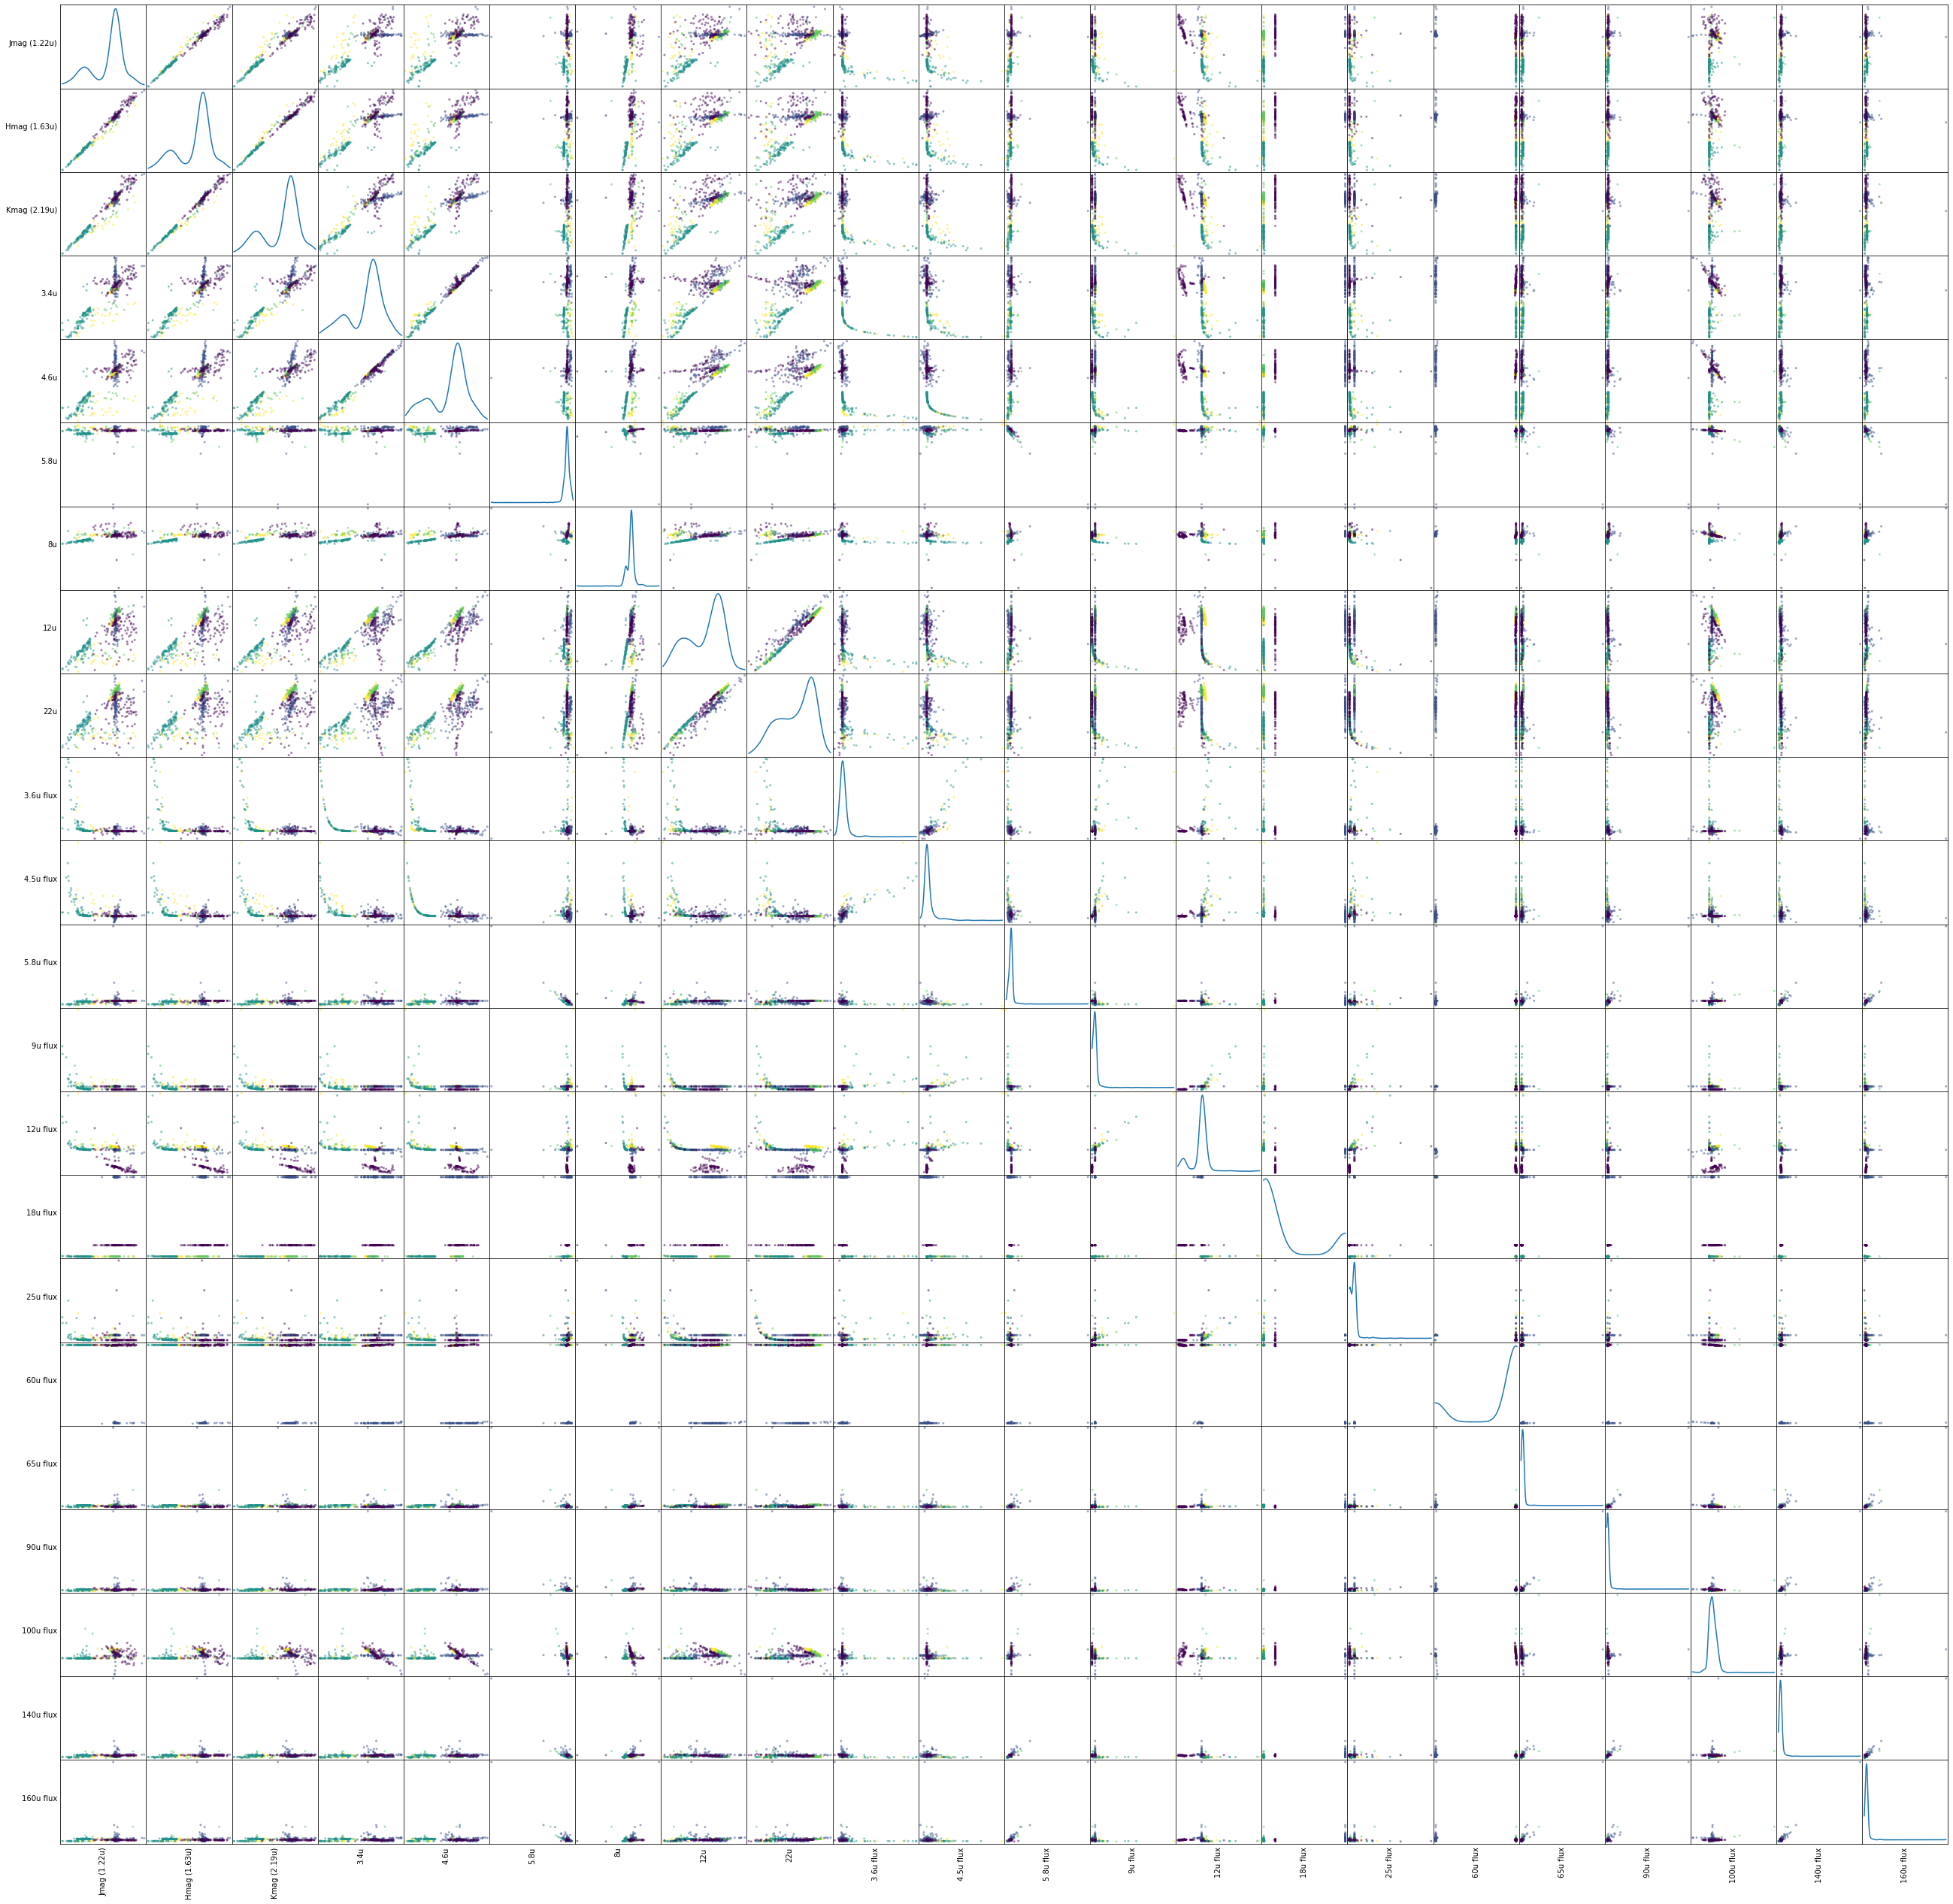

In [ ]:
cat_dict = {'post_AGB': 0, 'YSO': 1, 'S_AGB':2, 'O_AGB':3, 'C_AGB':4,}
Xcat = pd.concat([X,categories], axis=1)
sample_X = Xcat.groupby('class').sample(n=100, random_state=1)
colors = [cat_dict[i] for i in sample_X['class']]


sm = pd.plotting.scatter_matrix(sample_X, figsize=(45,45), c= colors , diagonal = 'kde')
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        ax.xaxis.label.set_rotation(90)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')
pic = sm[0][0].get_figure() 
pic.savefig("Scatter.png")
plt.show()

# Scaled data:

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

r_scaler = RobustScaler()
X_robust = r_scaler.fit_transform(X)
X_robust = pd.DataFrame(X_robust, columns= X.columns)

s_scaler = StandardScaler()
X_standard = s_scaler.fit_transform(X)
X_standard = pd.DataFrame(X_standard, columns= X.columns)

mm_scaler = MinMaxScaler()
X_minmax = mm_scaler.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax, columns= X.columns)

In [ ]:
X_standard.describe()

Jmag (1.22u)  Hmag (1.63u)  ...     140u flux     160u flux
count  7.956600e+04  7.956600e+04  ...  7.956600e+04  7.956600e+04
mean  -9.841672e-17 -1.518328e-16  ... -2.166662e-17 -1.121215e-17
std    1.000006e+00  1.000006e+00  ...  1.000006e+00  1.000006e+00
min   -8.790623e+00 -8.514747e+00  ... -4.659417e+00 -5.796685e+00
25%   -4.336014e-02 -7.078048e-02  ... -2.369853e-01 -2.196401e-01
50%    4.152167e-02  8.892927e-02  ... -1.516714e-01 -7.192775e-02
75%    1.477528e-01  2.459906e-01  ...  1.757280e-02  6.774578e-03
max    1.069579e+01  5.956823e+00  ...  8.295323e+01  8.094005e+01

[8 rows x 22 columns]

* **Correlation Matrix for Standard Scaled X:**

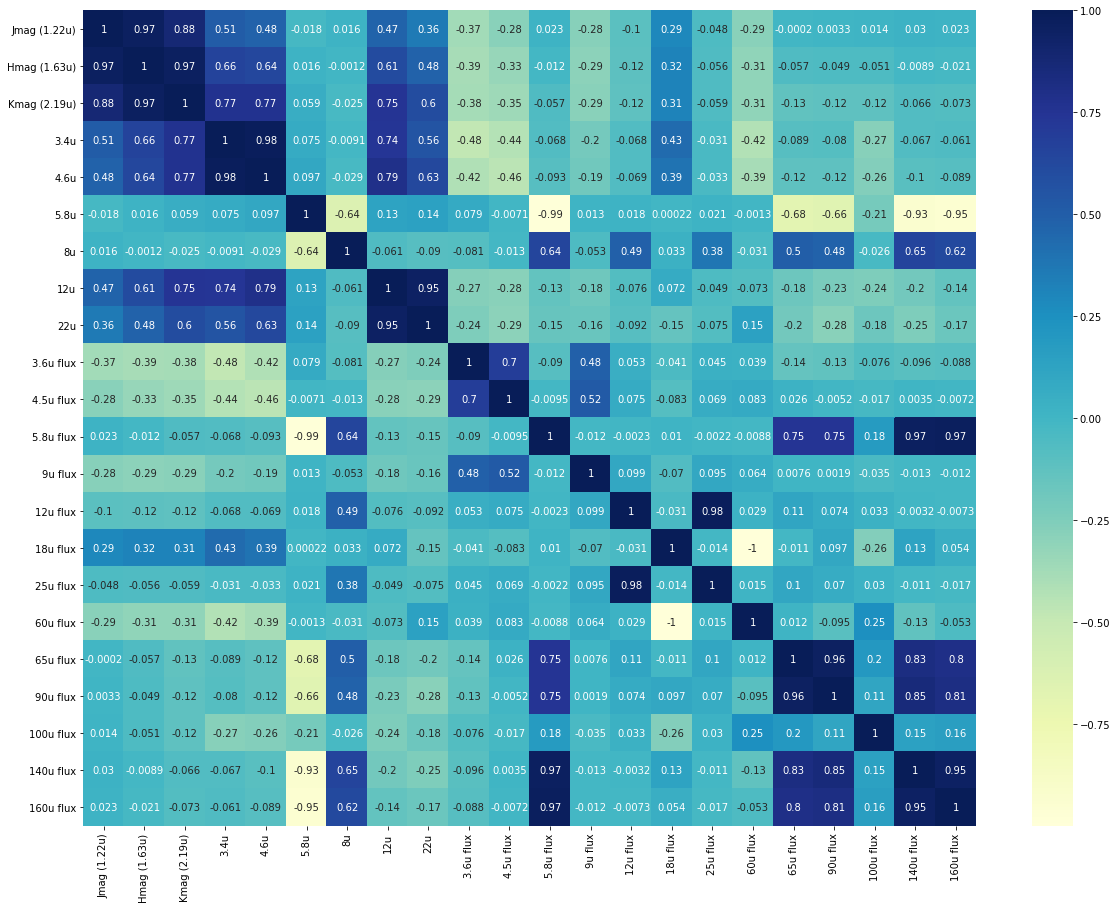

In [ ]:
fig = plt.figure(figsize = [20, 15])
sns.heatmap(X_standard.corr(), annot = True, cmap="YlGnBu")

plt.savefig('StdXCorr.pdf')

* **Scatter plot for Standard Scaled X:**

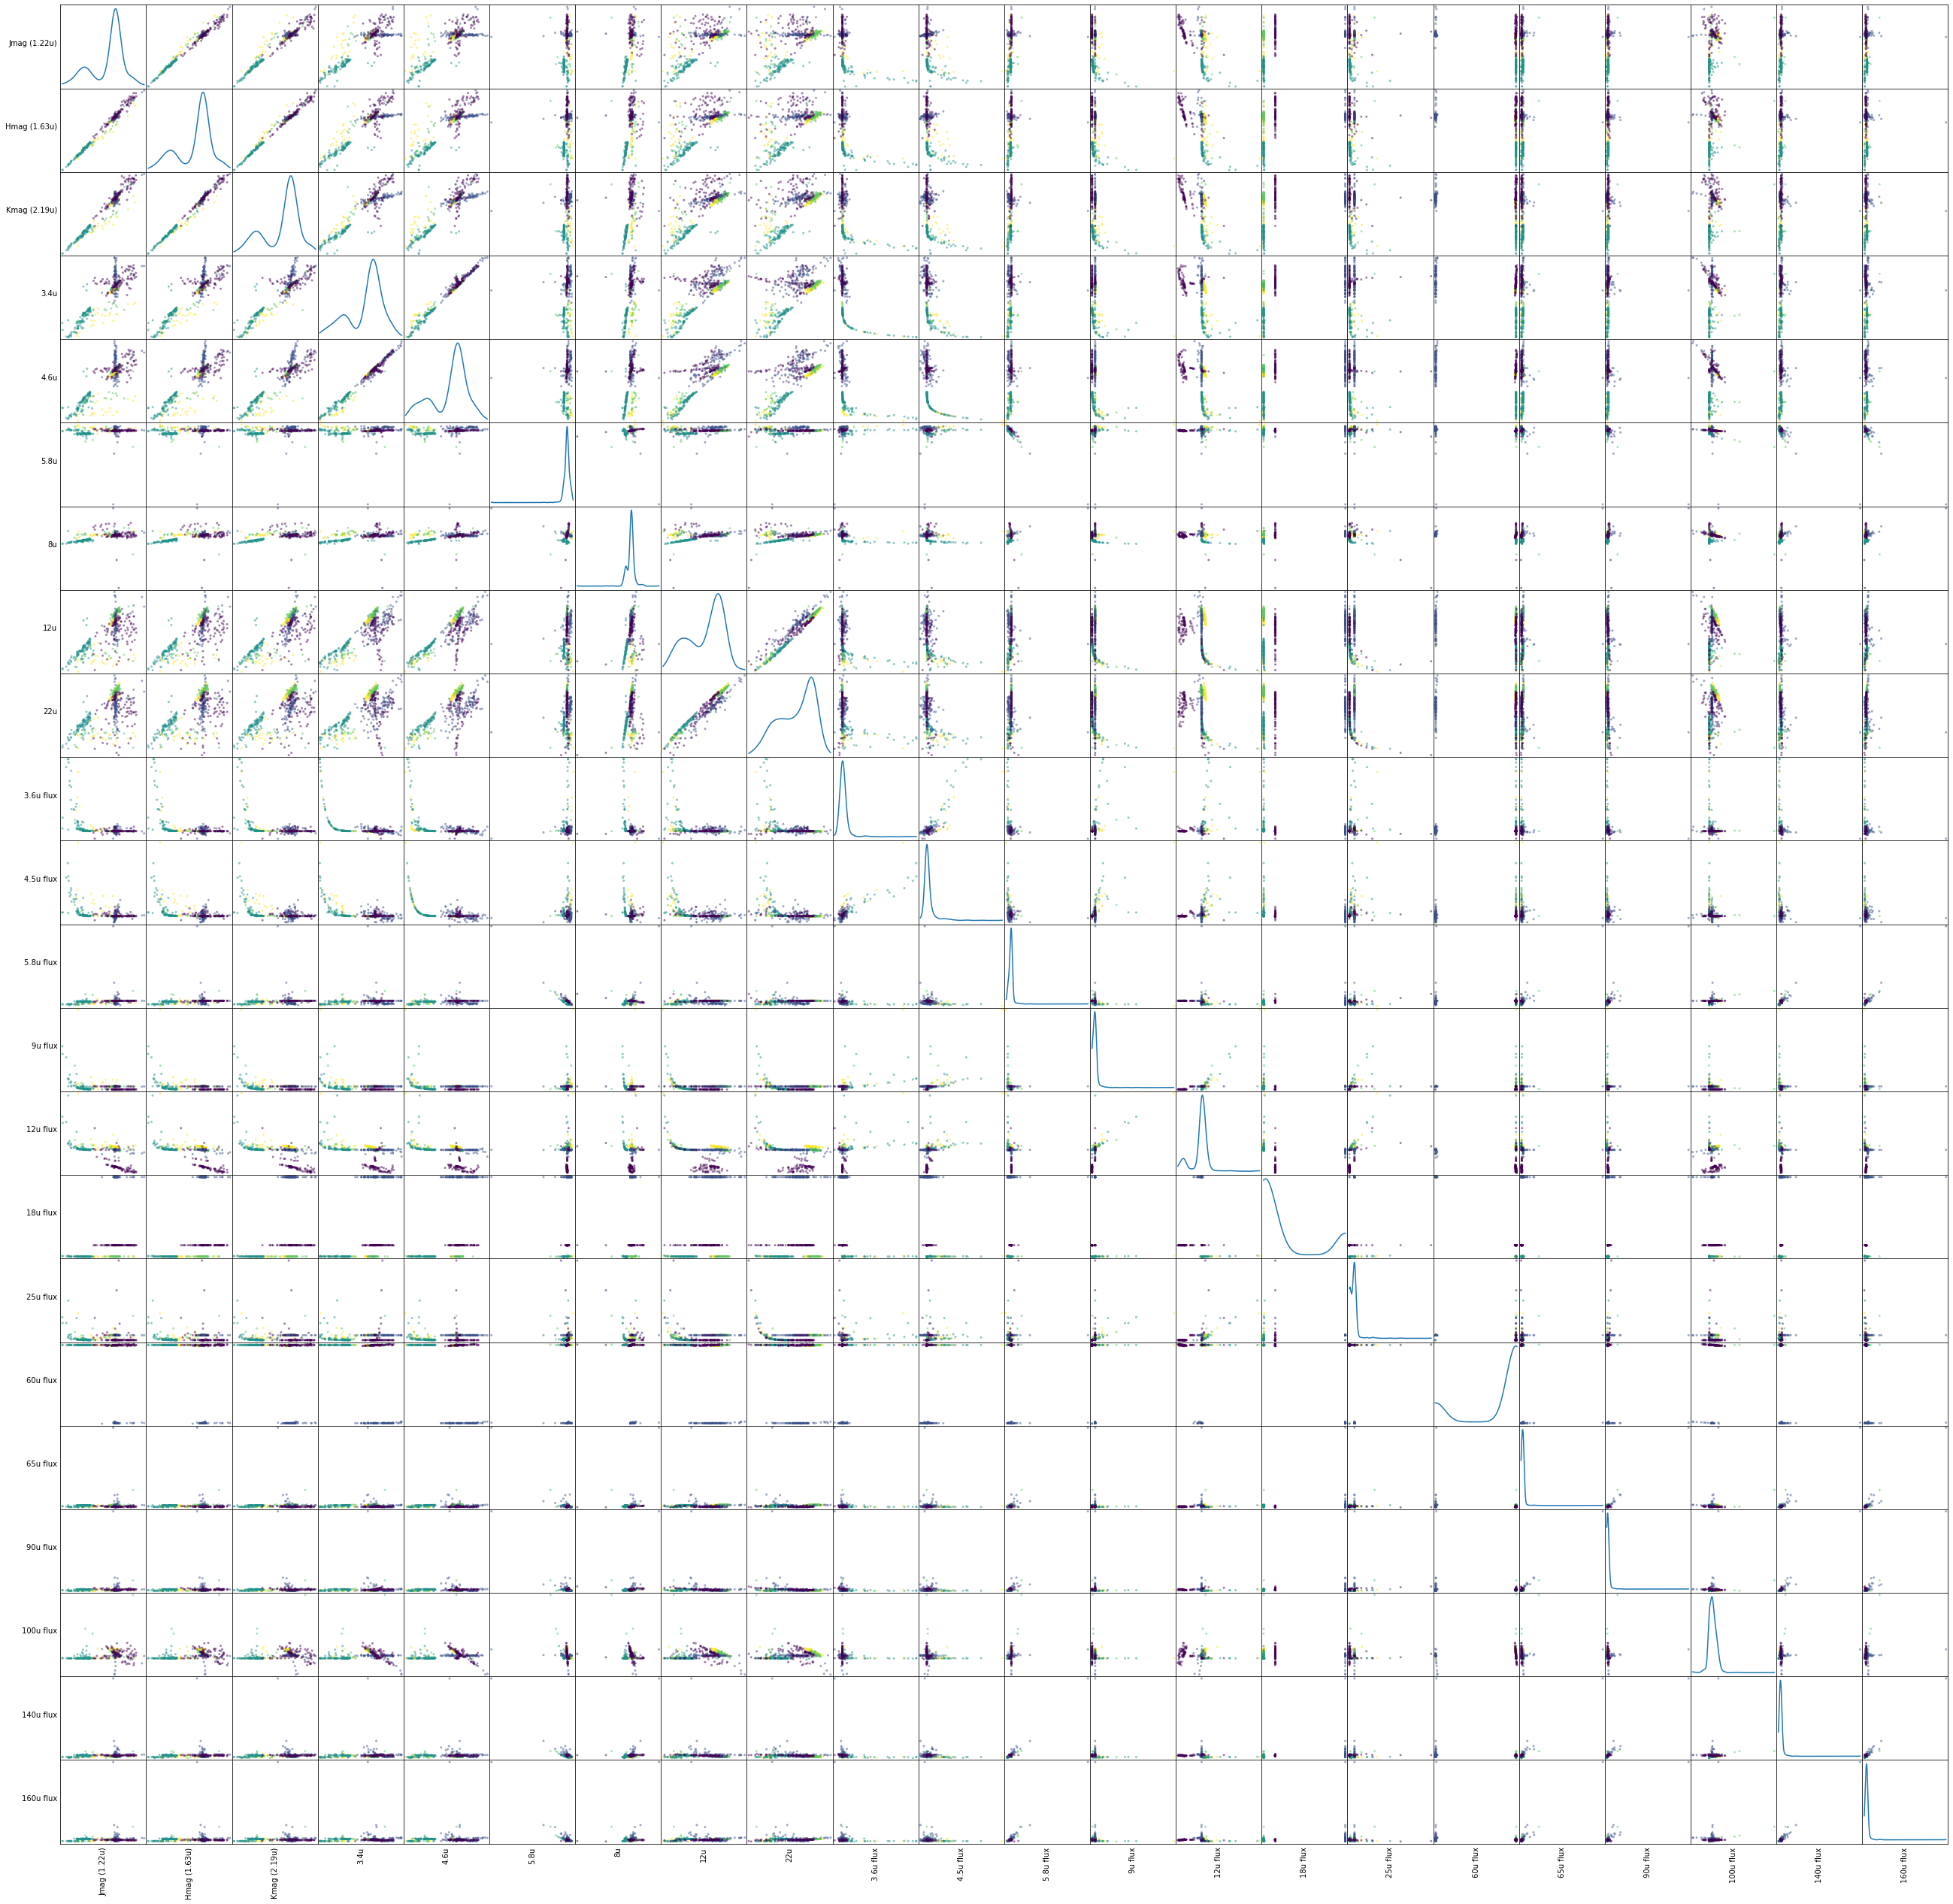

In [ ]:
Xscat = pd.concat([X_standard,categories], axis=1)
sample_Xs = Xscat.groupby('class').sample(n=100, random_state=1)
colors = [cat_dict[i] for i in sample_Xs['class']]

sm = pd.plotting.scatter_matrix(sample_Xs , figsize=(45,45) , c= colors , diagonal = 'kde')
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        ax.xaxis.label.set_rotation(90)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')
pic = sm[0][0].get_figure() 
pic.savefig("StdXScatter.png")
plt.show()

In [ ]:
STD = pd.concat([X.std(), X_robust.std(), X_minmax.std(), X_standard.std()], axis=1) 
STD = STD.rename(columns={0: 'X', 1: 'Robust', 2: 'MinMax', 3: 'Standard'})
 
print(STD)

                         X       Robust    MinMax  Standard
Jmag (1.22u)      1.751895     5.232540  0.051318  1.000006
Hmag (1.63u)      1.811070     3.156874  0.069101  1.000006
Kmag (2.19u)      1.961169     1.837932  0.067080  1.000006
3.4u              3.338473     0.905656  0.071430  1.000006
4.6u              3.502219     0.946802  0.061414  1.000006
5.8u             72.806616     4.259808  0.010535  1.000006
8u                9.135599     4.067180  0.005202  1.000006
12u               3.076889     0.965659  0.057991  1.000006
22u               3.244464     0.823847  0.032761  1.000006
3.6u flux       103.104931     2.458192  0.030884  1.000006
4.5u flux        75.356536     2.174788  0.024652  1.000006
5.8u flux        51.140357     4.185114  0.011421  1.000006
9u flux          13.603200    50.232096  0.016524  1.000006
12u flux        180.743195   129.261910  0.003791  1.000006
18u flux       6806.417700     0.453143  0.449314  1.000006
25u flux         89.569960  1327.198689 

# **PCA:**

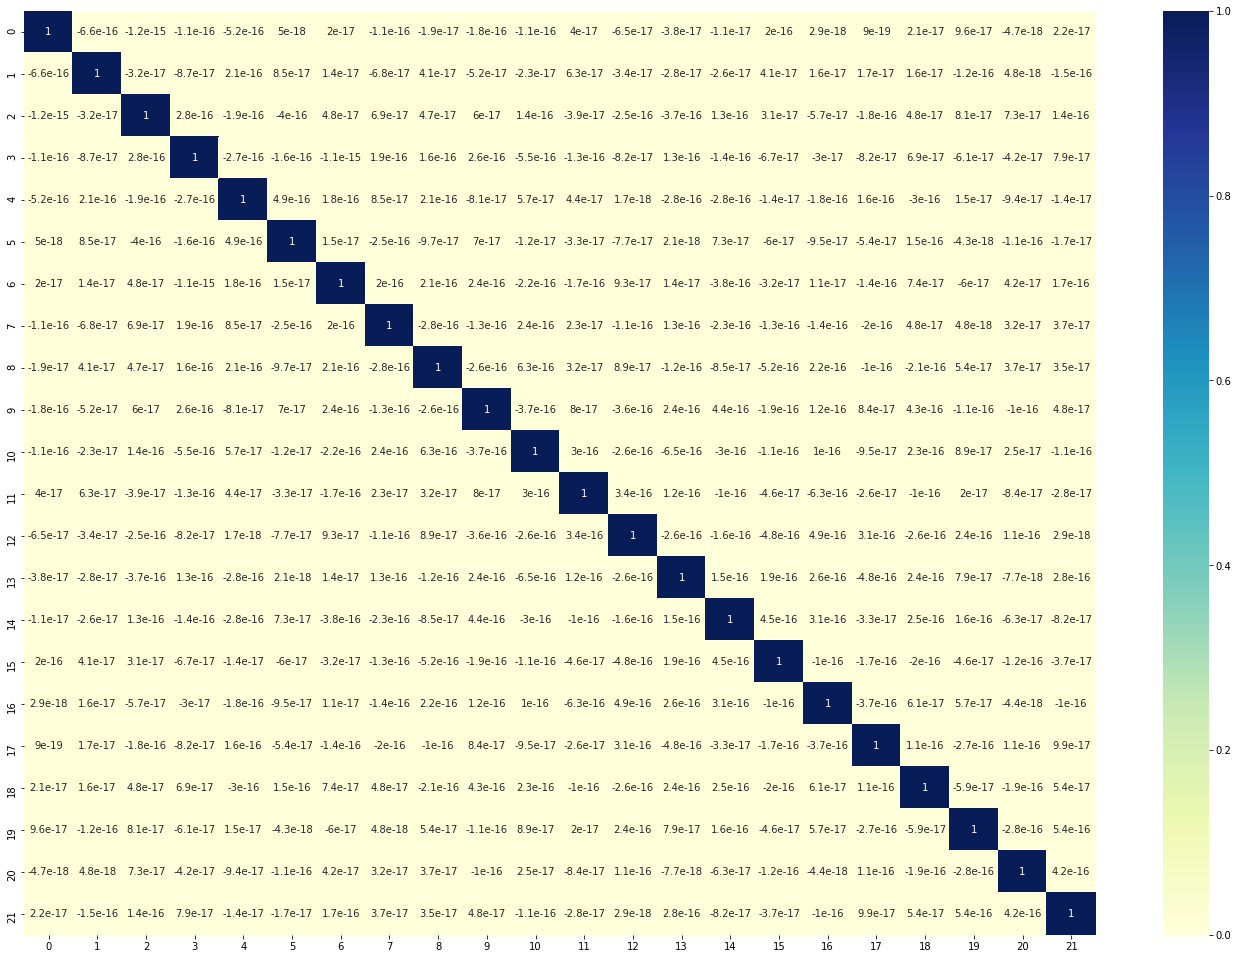

In [ ]:
from sklearn.decomposition import PCA

t = X_robust
pca = PCA()
t = pca.fit_transform(t)
t = pd.DataFrame(t)

fig = plt.figure(figsize = [24, 17])
sns.heatmap(t.corr(), annot = True, cmap="YlGnBu")

plt.savefig('PCACorr.pdf')

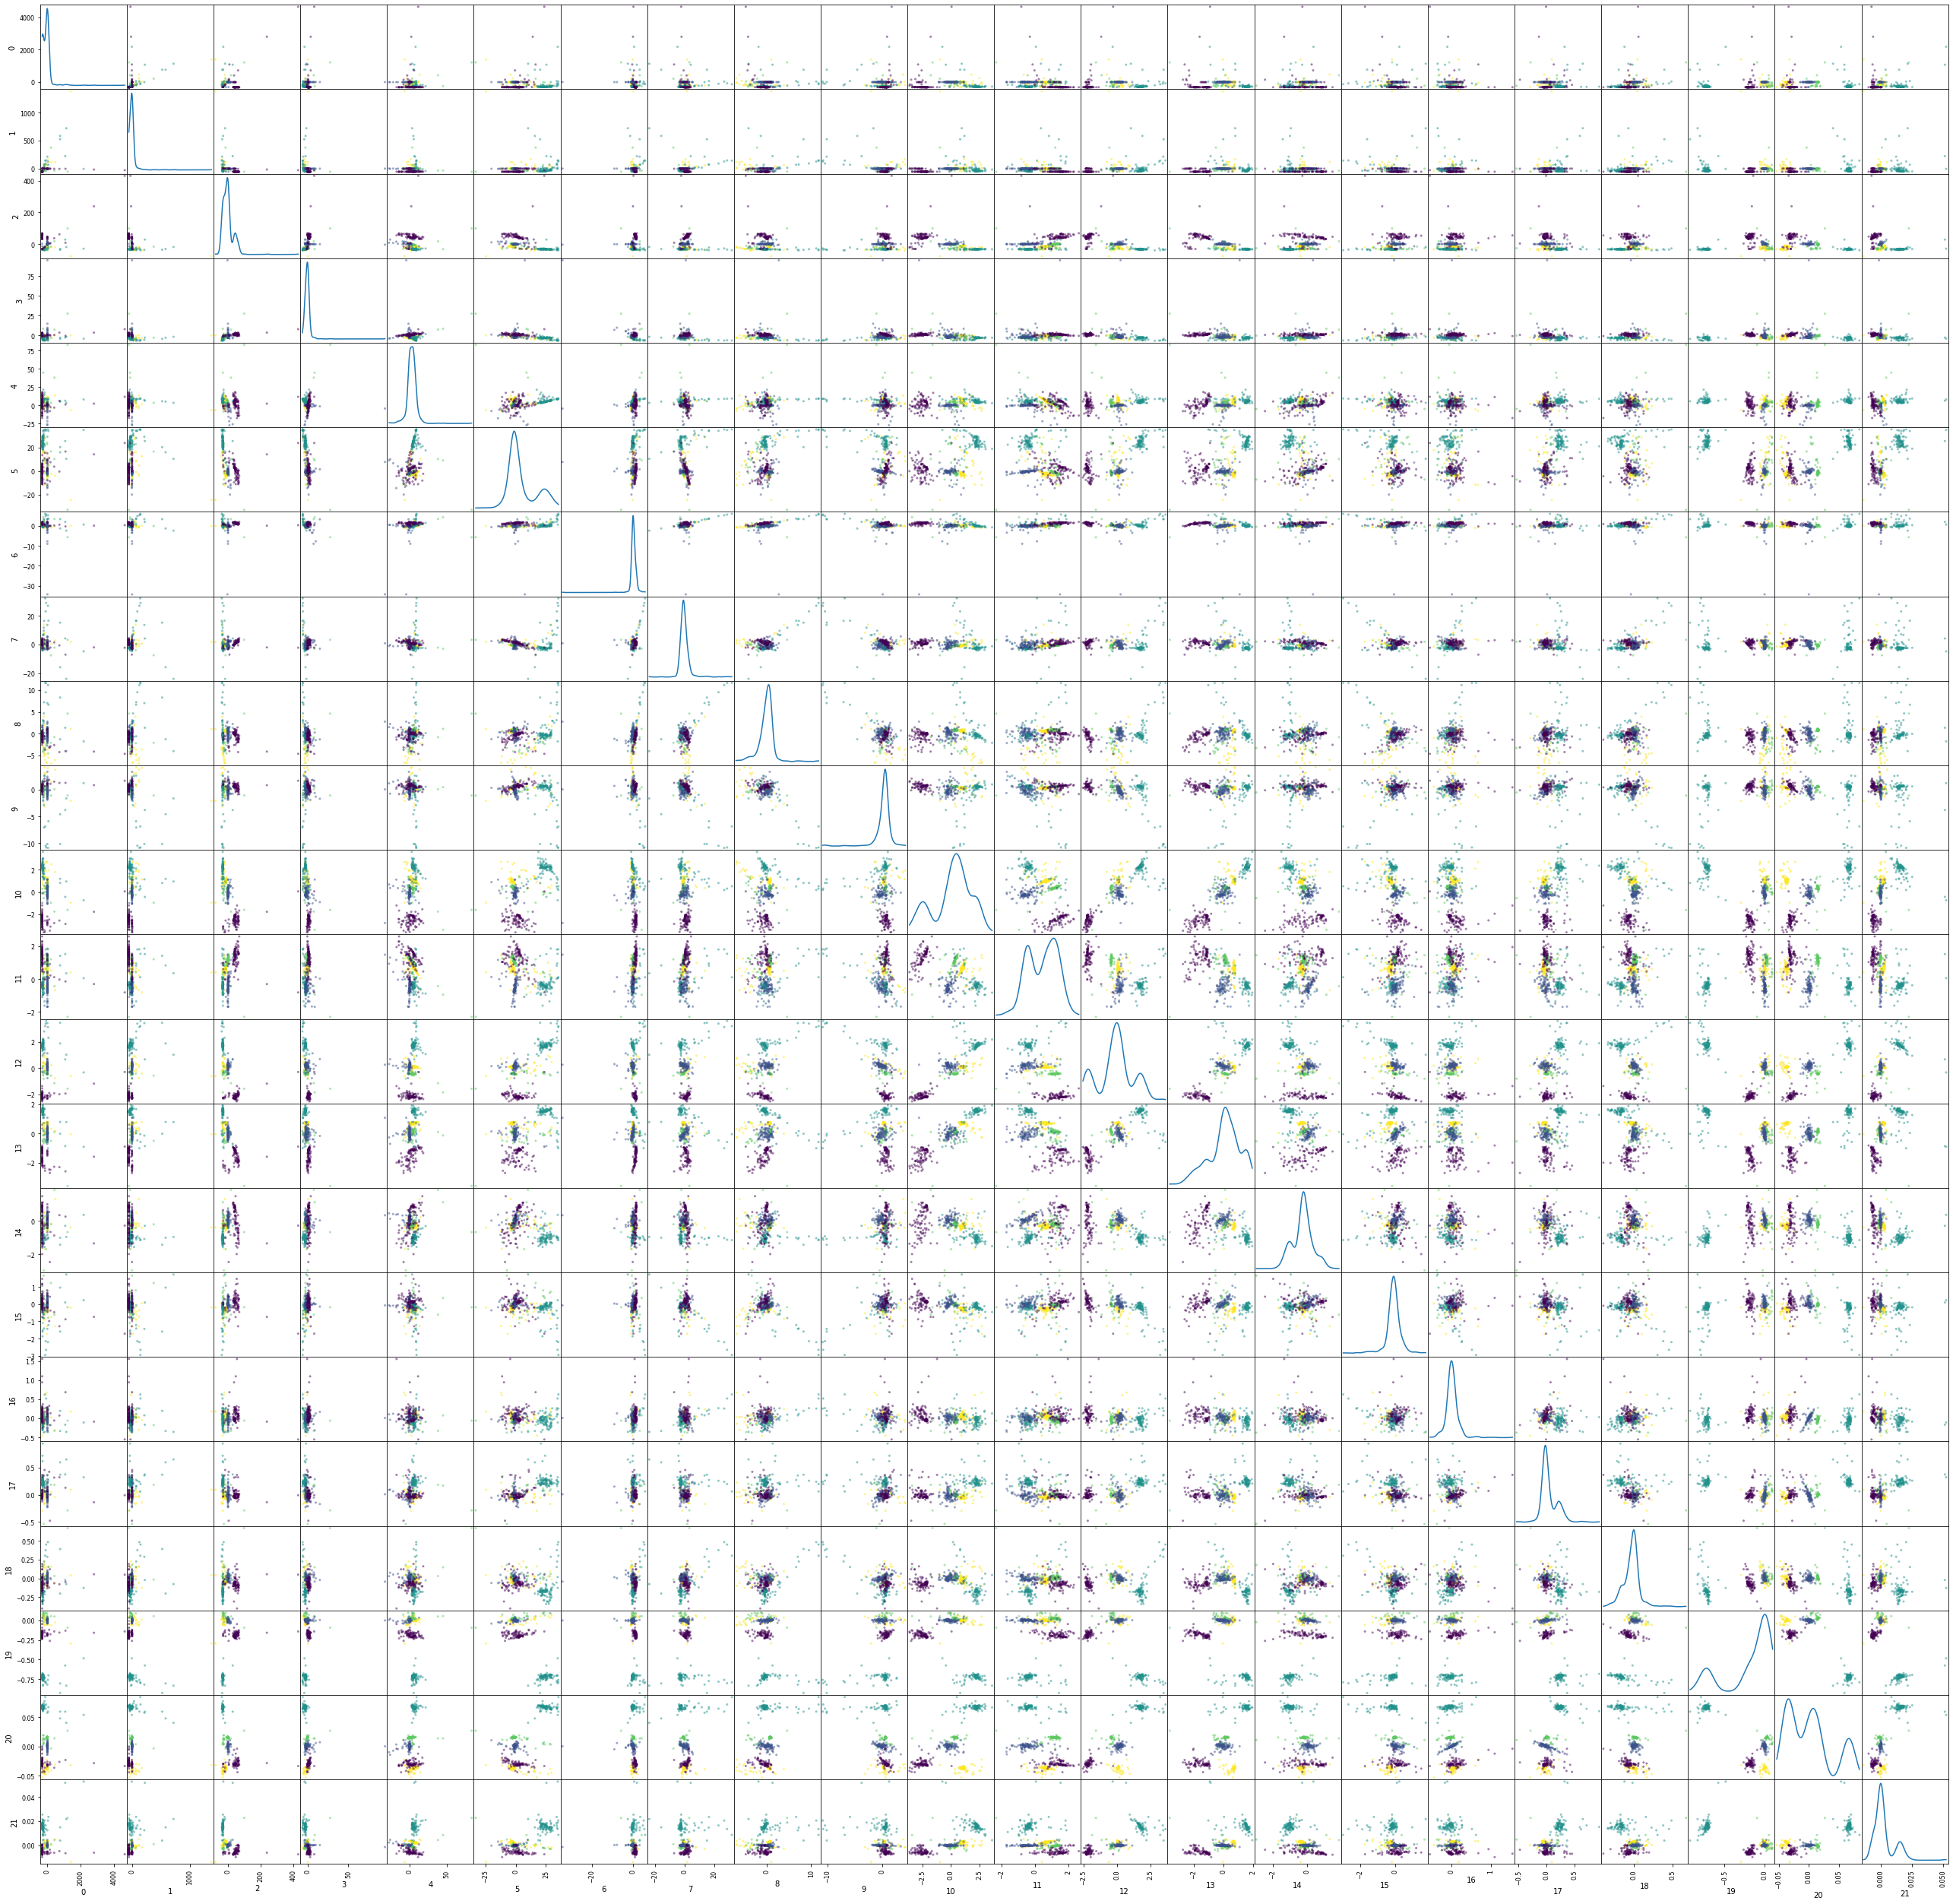

In [ ]:
tcat = pd.concat([t,categories], axis=1)
sample_t = tcat.groupby('class').sample(n=100, random_state=1)
colors = [cat_dict[i] for i in sample_t['class']]

pd.plotting.scatter_matrix(sample_t , figsize=(45,45) , c= colors , diagonal = 'kde')
plt.savefig("PCAScatter.png")
plt.show()

# Saving Dataframes:

In [ ]:
def savefile(df,name):
  t = df
  t.to_csv(name, header=True, index=True)
  return 0

savefile(data,'data')
savefile(Y,'Y.csv')
savefile(X,'X.csv')
savefile(X_standard,'X_standard')
savefile(X_robust,'X_robust')
savefile(X_minmax,'X_minmax')